In [31]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [32]:
d_p = 40
d_V = 80
epochs = 150


In [33]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(80,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
])



In [34]:
folder_path = "data/test_data/example_data/heat2d/"

In [35]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-16 20:34:42,446 - sciml.model.deeponet.deeponet - INFO - Model initialized with 300 epochs, 32 batch size, 0.001 learning rate


In [36]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 6049.55it/s]


In [37]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(40, 80)
(40, 8000, 3)
(40, 8000)


In [38]:
loss_history_train,loss_history_test = model.fit()

Loading y data: 100%|██████████| 40/40 [00:00<00:00, 6809.21it/s]
2025-03-16 20:34:42.968778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [40,8000]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/300 [00:00<?, ?it/s]2025-03-16 20:34:42.986607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,8000]
	 [[{{node Placeholder/_2}}]]
2025-03-16 20:34:43.319126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

In [39]:
print(loss_history_train)

[0.2950269281864166, 0.2847592234611511, 0.2727395296096802, 0.27010759711265564, 0.2606508433818817, 0.2541564106941223, 0.24872665107250214, 0.2421846091747284, 0.2365485429763794, 0.2313825488090515, 0.22509804368019104, 0.21847200393676758, 0.21167835593223572, 0.2037951946258545, 0.19584423303604126, 0.18771600723266602, 0.17910587787628174, 0.1720864623785019, 0.16516675055027008, 0.15923771262168884, 0.15354576706886292, 0.15017499029636383, 0.14804258942604065, 0.14592963457107544, 0.14464136958122253, 0.14366620779037476, 0.1423962116241455, 0.14061154425144196, 0.13838452100753784, 0.1362917721271515, 0.1344820261001587, 0.13278436660766602, 0.1310269832611084, 0.12927861511707306, 0.12797954678535461, 0.12644298374652863, 0.12476855516433716, 0.12310057133436203, 0.12148662656545639, 0.11988843977451324, 0.11829215288162231, 0.116917684674263, 0.11556054651737213, 0.11458861827850342, 0.11468815803527832, 0.114383265376091, 0.11268332600593567, 0.10872994363307953, 0.1113221

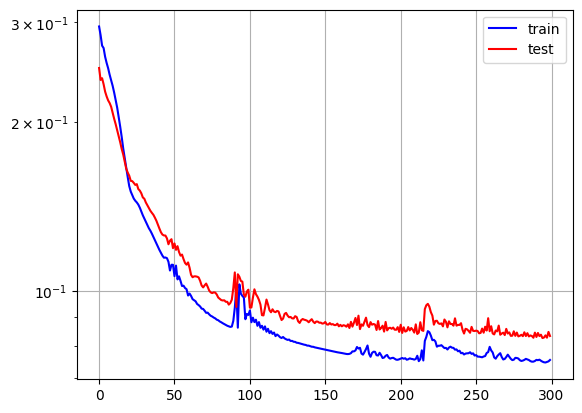

In [40]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()